# Scraping data for over 2000 movies

We want to analyze the distributions of IMDB and Metacritic movie ratings to see if we find anything interesting. To do this, we'll first scrape data for over 2000 movies.

https://www.dataquest.io/blog/web-scraping-beautifulsoup/

In [1]:
# Let's start writing the script by requesting the content of this single web page: 
# http://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=1. 
# In the following code cell we will:
#   Import the get() function from the requests module.
#   Assign the address of the web page to a variable named url.
#   Request the server the content of the web page by using get(), 
#        and store the server’s response in the variable response.
#   Print a small part of response's content by accessing its 
#         .text attribute (response is now a Response object).


In [2]:
from requests import get

url = 'https://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=1'

response = get(url)
print(response.text[:500])




<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle"


## Using BeautifulSoup to parse the HTML content

To parse our HTML document and extract the 50 div containers, we'll use a Python module called BeautifulSoup, the most common web scraping module for Python.

In the following code cell we will:

    Import the BeautifulSoup class creator from the package bs4.
    Parse response.text by creating a BeautifulSoup object, and assign this object to html_soup. The 'html.parser' argument indicates that we want to do the parsing using Python’s built-in HTML parser.


In [3]:
from bs4 import BeautifulSoup

html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

Before extracting the 50 div containers, we need to figure out what distinguishes them from other div elements on that page. Often, the distinctive mark resides in the class attribute. If you inspect the HTML lines of the containers of interest, you'll notice that the class attribute has two values: lister-item and mode-advanced. This combination is unique to these div containers. We can see that's true by doing a quick search (Ctrl + F). We have 50 such containers, so we expect to see only 50 matches:

In [4]:
# Now let's use the find_all() method to extract all the div containers that have 
# a class attribute of lister-item mode-advanced:
movie_containers = html_soup.find_all('div', class_= 'lister-item mode-advanced')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
50


find_all() returned a ResultSet object which is a list containing all the 50 divs we are interested in.

Now we'll select only the first container, and extract, by turn, each item of interest:

    The name of the movie.
    The year of release.
    The IMDB rating.
    The Metascore.
    The number of votes.


## Extracting the data for a single movie

We can access the first container, which contains information about a single movie, by using list notation on movie_containers.

In [5]:
first_movie = movie_containers[0]
first_movie

<div class="lister-item mode-advanced">
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt3315342"></div>
</div>
<div class="lister-item-image float-left">
<a href="/title/tt3315342/?ref_=adv_li_i"> <img alt="Logan" class="loadlate" data-tconst="tt3315342" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BYzc5MTU4N2EtYTkyMi00NjdhLTg3NWEtMTY4OTEyMzJhZTAzXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB499613450_.png" width="67"/>
</a> </div>
<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt3315342/?ref_=adv_li_tt">Logan</a>
<span class="lister-item-year text-muted unbold">(2017)</span>
</h3>
<p class="text-muted ">
<span class="certificate">R</span>
<span class="ghost">|</span>
<span class="runtime">137 min</span>
<span class="ghost">|</

## The name of the movie

In [1]:
# We begin with the movie's name, and locate its correspondent HTML line by using DevTools. 
# You can see that the name is contained within an anchor tag (<a>). This tag is nested within 
# a header tag (<h3>). The <h3> tag is nested within a <div> tag. This <div> is the third of 
# the divs nested in the container of the first movie. We stored the content of this container 
# in the first_movie variable.

In [ ]:
# First_movie is a Tag object, and the various HTML tags within it are stored as its attributes.
# We can access them just like we would access any attribute of a Python object. 
# However, using a tag name as an attribute will only select the first tag by that name. 
# If we run first_movie.div, we only get the content of the first div tag:

In [6]:
first_movie.div

<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt3315342"></div>
</div>

In [2]:
# Accessing the first anchor tag (<a>) doesn't take us to the movie's name. 
# The first <a> is somewhere within the second div:

In [7]:
first_movie.a

<a href="/title/tt3315342/?ref_=adv_li_i"> <img alt="Logan" class="loadlate" data-tconst="tt3315342" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BYzc5MTU4N2EtYTkyMi00NjdhLTg3NWEtMTY4OTEyMzJhZTAzXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB499613450_.png" width="67"/>
</a>

In [3]:
# However, accessing the first <h3> tag brings us very close:

In [8]:
first_movie.h3

<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt3315342/?ref_=adv_li_tt">Logan</a>
<span class="lister-item-year text-muted unbold">(2017)</span>
</h3>

In [ ]:
# From here, we can use attribute notation to access the first <a> inside the <h3> tag:

In [9]:
first_movie.h3.a

<a href="/title/tt3315342/?ref_=adv_li_tt">Logan</a>

In [ ]:
# Now it's all just a matter of accessing the text from within that <a> tag:

In [10]:
first_name = first_movie.h3.a.text
first_name

'Logan'

## The year of the movie's release

In [ ]:
# We move on with extracting the year. This data is stored within the <span> tag below 
# the <a> that contains the name.

In [ ]:
# Dot notation will only access the first span element. We'll search by the distinctive 
# mark of the second <span>. We'll use the find() method which is almost the same 
# as find_all(), except that it only returns the first match. In fact, find() is equivalent 
# to find_all(limit = 1). The limit argument limits the output to the first match.

In [ ]:
# The distinguishing mark consists of the values lister-item-year text-muted unbold assigned 
# to the class attribute. So we look for the first <span> with these values within the <h3> tag:

In [11]:
first_year = first_movie.h3.find('span', class_= 'lister-item-year text-muted unbold')
first_year

<span class="lister-item-year text-muted unbold">(2017)</span>

In [12]:
#From here, we just access the text using attribute notation:

In [13]:
first_year = first_year.text
first_year

'(2017)'

## The IMDB rating


In [ ]:
# We now focus on extracting the IMDB rating of the first movie.

# There are a couple of ways to do that, but we'll first try the easiest one. 
# If you inspect the IMDB rating using DevTools, you'll notice that the rating is 
# contained within a <strong> tag.

In [14]:
# Let's use attribute notation, and hope that the first <strong> 
# will also be the one that contains the rating.

In [15]:
first_movie.strong

<strong>8.1</strong>

In [16]:
# Access the text, and convert it to the float type, and assign it to the variable first_imdb:

In [17]:
first_imdb = float(first_movie.strong.text)
first_imdb

8.1

## The Metascore

If we inspect the Metascore using DevTools, we'll notice that we can find it within a span tag.

In [4]:
# Attribute notation clearly isn't a solution. There are many <span> tags before that. 
# You can see one right above the <strong> tag. We'd better use the distinctive values 
# of the class attribute (metascore favorable).

In [18]:
first_mscore = first_movie.find('span', class_= 'metascore favorable')

first_mscore = int(first_mscore.text)
print(first_mscore)

77


## The number of votes

In [19]:
first_votes = first_movie.find('span', attrs = {'name':'nv'})
first_votes

<span data-value="491572" name="nv">491,572</span>

In [ ]:
# We could use .text notation to access the <span> tag's content. 
# It would be better though if we accessed the value of the data-value attribute. 
# This way we can convert the extracted datapoint to an int without having to strip a comma.

In [20]:
first_votes['data-value']

'491572'

In [21]:
# Convert that value to an integer, and assign it to first_votes:
first_votes = int(first_votes['data-value'])

In [22]:
print(first_votes)

491572


In [23]:
# That's it! We're now in a position to easily write a script for scraping a single page.

## The script for a single page

Before piecing together what we've done so far, we have to make sure that we'll extract the data only from the containers that have a Metascore.

In [ ]:
# We need to add a condition to skip movies without a Metascore.

# Using DevTools again, we see that the Metascore section is contained within a <div> tag. 
# The class attribute has two values: inline-block and ratings-metascore. 
# The distinctive one is clearly ratings-metascore.

In [ ]:
# We can use find() to search each movie container for a div having that distinct mark. 
# When find() doesn't find anything, it returns a None object. We can use this result in an 
# if statement to control whether a movie is scraped.

In [ ]:
# Let's look on the web page to search for a movie container that doesn't have a Metascore, 
# and see what find() returns.

Important: when I ran the following code, the eighth container didn't have a Metascore. However, this is a moving target, because the number of votes constantly changes for each movie. To get the same outputs as I did in the next demonstrative code cell, you should search a container that doesn't have a Metascore at the time you're running the code.

In [24]:
twenty_two_movie_mscore = movie_containers[21].find('div', class_='ratings-metascore')
type(twenty_two_movie_mscore)

NoneType

In [38]:
# Lists to store the scraped data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

# Extract data from individual movie container
for container in movie_containers:
    
    # if the movie has Metascore, then extract:
    if container.find('div', class_= 'ratings-metascore') is not None:
        
        # The name
        name = container.h3.a.text
        names.append(name)
        
        # The year
        year = container.h3.find('span', class_= 'lister-item-year').text
        years.append(year)
        
        # The IMDB rating
        imdb = float(container.strong.text)
        imdb_ratings.append(imdb)
        
        # The Metascore
        m_score = container.find('span', class_= 'metascore').text
        metascores.append(int(m_score))
        
        # The number of votes
        vote = container.find('span', attrs = {'name':'nv'})['data-value']
        #print(vote)
        votes.append(int(vote))

Check the data collected so far. Pandas makes it easy for us to see whether we've scraped our data successfully.

In [39]:
import pandas as pd

test_df = pd.DataFrame({'movie': names,
                        'year': years,
                        'imdb': imdb_ratings,
                        'metascore': metascores,
                        'votes': votes})
print(test_df.info())
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 5 columns):
imdb         46 non-null float64
metascore    46 non-null int64
movie        46 non-null object
votes        46 non-null int64
year         46 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 1.9+ KB
None


,imdb,metascore,movie,votes,year
0,8.1,77,Logan,491572,(2017)
1,7.5,76,Wonder Woman,421394,(2017)
2,8.0,94,Dunkirk,400802,(2017)
3,7.3,85,Star Wars: Episode VIII - The Last Jedi,395763,(2017)
4,7.7,67,Guardians of the Galaxy Vol. 2,391871,(2017)
5,7.9,74,Thor: Ragnarok,354734,(2017)
6,7.5,73,Spider-Man: Homecoming,337932,(2017)
7,7.7,84,Get Out,315147,(I) (2017)
8,8.1,81,Blade Runner 2049,308974,(2017)
9,7.7,86,Baby Driver,307567,(2017)


In [52]:
headers = {"Accept-Language": "en-US, en;q=0.5"}

## The script for multiple pages

Scraping multiple pages is a bit more challenging. We'll build upon our one-page script by doing three more things:

    Making all the requests we want from within the loop.
    Controlling the loop's rate to avoid bombarding the server with requests.
    Monitoring the loop while it runs.

We'll scrape the first 4 pages of each year in the interval 2000-2017. 4 pages for each of the 18 years makes for a total of 72 pages. Each page has 50 movies, so we'll scrape data for 3600 movies at most. But not all the movies have a Metascore, so the number will be lower than that. Even so, we are still very likely to get data for over 2000 movies.

### Changing the URL's parameters

As shown earlier, the URLs follow a certain logic as the web pages change.

In [31]:
# https://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=2&ref_=adv_nxt

In [40]:
pages = [str(i) for i in range(1,5)]
years_url = [str(i) for i in range(2000,2018)]

## Controlling the crawl-rate

In [42]:
# example
#from time import sleep
#from random import randint

#for _ in range(0,5):
#    print('Blah')
#    sleep(randint(1,4))

In [43]:
# For now, let's just import these two funciton to prevent overcrowding in the code
# cell containig our main loop.

In [45]:
from time import sleep
from random import randint

## Monitoring the loop as it's still going

In [47]:
from time import time

start_time = time()
requests = 0

for _ in range(5):
    # A request would go here
    requests += 1
    sleep(randint(1,3))
    elapsed_time = time() - start_time
    print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))

Request: 1; Frequency: 0.3332551239028863 requests/s
Request: 2; Frequency: 0.33326919783254055 requests/s
Request: 3; Frequency: 0.3749337164519431 requests/s
Request: 4; Frequency: 0.3999347221110446 requests/s
Request: 5; Frequency: 0.45446655366431904 requests/s


Since we're going to make 72 requests, our work will look a bit untidy as the output accumulates. To avoid that, we'll clear the output after each iteration, and replace it with information about the most recent request. To do that we'll use the clear_output()function from the IPython's core.display module. We'll set the wait parameter of clear_output() to True to wait with replacing the current output until some new output appears.

In [48]:
from IPython.core.display import clear_output

start_time = time()
requests = 0

for _ in range(5):
    # A request would go here
    requests += 1
    sleep(randint(1,3))
    current_time = time()
    elapsed_time = current_time - start_time
    print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
    clear_output(wait = True)

Request: 5; Frequency: 0.35679208805813944 requests/s


In [49]:
from warnings import warn

warn("Warning Simulation")

C:\Users\mladjo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Warning Simulation
  This is separate from the ipykernel package so we can avoid doing imports until


## Piecing everything together

Now let's piece together everything we've done so far! In the following code cell, we start by:

    Redeclaring the lists variables so they become empty again.
    Preparing the monitoring of the loop.

Then, we'll:

    Loop through the years_url list to vary the release_date parameter of the URL.
    For each element in years_url, loop through the pages list to vary the page parameter of the URL.
    Make the GET requests within the pages loop (and give the headers parameter the right value to make sure we get only English content).
    Pause the loop for a time interval between 8 and 15 seconds.
    Monitor each request as discussed before.
    Throw a warning for non-200 status codes.
    Break the loop if the number of requests is greater than expected.
    Convert the response's HTML content to a BeautifulSoup object.
    Extract all movie containers from this BeautifulSoup object.
    Loop through all these containers.
    Extract the data if a container has a Metascore.


In [55]:
# Redeclaring the lists to store data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

# Preparing the monitoring of the loop
start_time = time()
requests = 0

# For every year monitoring of the loop
for year_url in years_url:
    
    # For every page in the interval 1-4
    for page in pages:
        
        # Make a get request
        response = get('http://www.imdb.com/search/title?release_date=' + year_url +
        '&sort=num_votes,desc&page=' + page, headers = headers)
        #print(response)
        
        # Pause the loop
        sleep(randint(8,15))
        
        # Monitor the requests
        requests += 1
        elapsed_time = time() - start_time
        print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
        clear_output(wait = True)
        
        # Throw a warning for non-200 status codes
        if response.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, response.status_code))
        
        # Break the loop if the number of requests is greater than expected
        if requests > 72:
            warn('Number of requests was greater than expected.')
            break
            
        # Parse the content of the request with BeautifulSoup
        page_html = BeautifulSoup(response.text, 'html.parser')
        
        # Select all the 50 movie containers from  a single page
        mv_containers = page_html.find_all('div', class_= 'lister-item mode-advanced')
        
        # For every movie of these 50
        for container in mv_containers:
            # If the movie has a Metascore, then:
            if container.find('div', class_= 'ratings-metascore') is not None:
                
                # Scrape the name
                name = container.h3.a.text
                names.append(name)
                
                # Scrape the year
                year = container.h3.find('span', class_= 'lister-item-year').text
                years.append(year)
                
                # Scrape the IMDB rating
                imdb = float(container.strong.text)
                imdb_ratings.append(imdb)
                
                # Scrape the Metascore
                m_score = container.find('span', class_= 'metascore').text
                metascores.append(int(m_score))
                
                # Scrape the number of votes
                vote = container.find('span', attrs = {'name':'nv'})['data-value']
                votes.append(int(vote))        
        
        
        
        

Request:72; Frequency: 0.07995001554625836 requests/s


Now let's merge the data into a pandas DataFrame to examine what we've managed to scrape. If everything is as expected, we can move on with cleaning the data to get it ready for analysis.

## Examining the scraped data

In the next code block we:

    Merge the data into a pandas DataFrame.
    Print some informations about the newly created DataFrame.
    Show the first 10 entries.


In [57]:
movie_ratings = pd.DataFrame({'movie': names,
                              'year': years,
                              'imdb': imdb_ratings,
                              'metascore': metascores,
                              'votes': votes})
print(movie_ratings.info())
movie_ratings.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2949 entries, 0 to 2948
Data columns (total 5 columns):
imdb         2949 non-null float64
metascore    2949 non-null int64
movie        2949 non-null object
votes        2949 non-null int64
year         2949 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 115.3+ KB
None


,imdb,metascore,movie,votes,year
0,8.5,67,Gladiator,1139386,(2000)
1,8.5,80,Memento,978501,(2000)
2,8.3,55,Snatch,685636,(2000)
3,8.3,68,Requiem for a Dream,664958,(2000)
4,7.4,64,X-Men,511407,(2000)
5,7.8,73,Cast Away,449222,(2000)
6,7.6,64,American Psycho,408153,(2000)
7,7.2,62,Unbreakable,295176,(2000)
8,7.0,73,Meet the Parents,283801,(2000)
9,6.1,59,Mission: Impossible II,270151,(2000)


The output of info() shows we collected data for well over 2000 movies. We can also see that there are no null values in our dataset whatsoever.

I have checked the ratings of these first 10 movies against the IMDB's website. They were all correct. You may want to do the same thing yourself.

We can safely proceed with cleaning the data.

## Cleaning the scraped data

We'll clean the scraped data with two goals in mind: plotting the distribution of IMDB and Metascore ratings, and sharing the dataset. Consequently, our data cleaning will consist of:

    Reordering the columns.
    Cleaning the year column and convert the values to integers.
    Checking the extreme rating values to determine if all the ratings are within the expected intervals.
    Normalizing one of the ratings type (or both) for generating a comparative histogram.

Start by reordering the columns:

In [58]:
movie_ratings = movie_ratings[['movie','year','imdb','metascore','votes']]
movie_ratings.head()

,movie,year,imdb,metascore,votes
0,Gladiator,(2000),8.5,67,1139386
1,Memento,(2000),8.5,80,978501
2,Snatch,(2000),8.3,55,685636
3,Requiem for a Dream,(2000),8.3,68,664958
4,X-Men,(2000),7.4,64,511407


Convert all the values in the year column to integers.

Right now all the values are of the object type. To avoid ValueErrors upon conversion, we want the values to be composed only from numbers from 0 to 9.

Let's examine the unique values of the year column. This helps us to get an idea of what we could do to make the conversions we want. To see all the unique values, we'll use the unique() method:

In [59]:
movie_ratings['year'].unique()

array(['(2000)', '(I) (2000)', '(2001)', '(I) (2001)', '(2002)',
       '(I) (2002)', '(2003)', '(I) (2003)', '(2004)', '(I) (2004)',
       '(2005)', '(I) (2005)', '(2006)', '(I) (2006)', '(2007)',
       '(I) (2007)', '(2008)', '(I) (2008)', '(2009)', '(I) (2009)',
       '(II) (2009)', '(2010)', '(I) (2010)', '(II) (2010)', '(2011)',
       '(I) (2011)', '(IV) (2011)', '(2012)', '(I) (2012)', '(II) (2012)',
       '(2013)', '(I) (2013)', '(II) (2013)', '(2014)', '(I) (2014)',
       '(II) (2014)', '(III) (2014)', '(2015)', '(I) (2015)',
       '(II) (2015)', '(VI) (2015)', '(III) (2015)', '(2016)',
       '(II) (2016)', '(I) (2016)', '(IX) (2016)', '(V) (2016)', '(2017)',
       '(I) (2017)', '(III) (2017)', '(II) (2017)'], dtype=object)

Counting from the end toward beginning, we can see that the years are always located from the fifth character to the second. We'll use the .str() method to select only that interval. We'll 
also convert the result to an integer using the astype() method:

In [61]:
movie_ratings.loc[:, 'year'] = movie_ratings['year'].str[-5:-1].astype(int)

In [62]:
movie_ratings['year'].head(3)

0    2000
1    2000
2    2000
Name: year, dtype: int32

Check the minimum and maximum values of each type of rating. We can do this very quickly by using pandas' describe() method. When applied on a DataFrame, this method returns various descriptive statistics for each numerical column of the DataFrame. In the next line of code we select only those rows that describe the minimum and maximum values, and only those columns which describe IMDB ratings and Metascores.

In [63]:
movie_ratings.describe().loc[['min','max'],['imdb','metascore']]

,imdb,metascore
min,1.6,7.0
max,9.0,100.0


There are no unexpected outliers.

From the values above, you can see that the two ratings have different scales. To be able to plot the two distributions on a single graph, we'll have to bring them to the same scale. Let's normalize the imdb column to a 100-points scale.

Multiply each IMDB rating by 10, and then we'll do a quick check by looking at the first 3 rows:

In [64]:
movie_ratings['n_imdb'] = movie_ratings['imdb'] * 10
movie_ratings.head(3)

,movie,year,imdb,metascore,votes,n_imdb
0,Gladiator,2000,8.5,67,1139386,85.0
1,Memento,2000,8.5,80,978501,85.0
2,Snatch,2000,8.3,55,685636,83.0


We are now in a position to save this dataset locally, so we can share it with others more easily. 

In [65]:
movie_ratings.to_csv('movie_ratings.csv')

As a side note, I strongly recommend saving the scraped dataset before exiting (or restarting) your notebook kernel. This way you will only have to import the dataset when you resume working, and don't have to run the scraping script again. This becomes extremely useful if you scrape hundreds or thousands of web pages.

## Plotting and analyzing the distributions

In the following code cell we:

    Import the matplotlib.pyplot submodule.
    Run the Jupyter magic %matplotlib to activate Jupyter's matplotlib mode and add inline to have our graphs displayed inside the notebook.
    Create a figure object with 3 axes.
    Plot the distribution of each unnormalized rating on an individual ax.
    Plot the normalized distributions of the two ratings on the same ax.
    Hide the top and right spines of all the three axes.


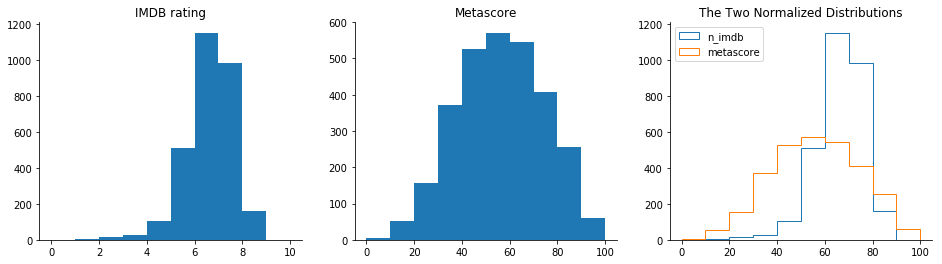

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax1, ax2, ax3 = fig.axes

ax1.hist(movie_ratings['imdb'], bins = 10, range = (0,10)) # bin range = 1
ax1.set_title('IMDB rating')

ax2.hist(movie_ratings['metascore'], bins = 10, range = (0,100)) # bin range = 10
ax2.set_title('Metascore')

ax3.hist(movie_ratings['n_imdb'], bins = 10, range = (0,100), histtype = 'step')
ax3.hist(movie_ratings['metascore'], bins = 10, range = (0,100), histtype = 'step')
ax3.legend(loc = 'upper left')
ax3.set_title('The Two Normalized Distributions')

for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
plt.show()

Starting with the IMDB histogram, we can see that most ratings are between 6 and 8. There are few movies with a rating greater than 8, and even fewer with a rating smaller than 4. This indicates that both very good movies and very bad movies are rarer.

The distribution of Metascore ratings resembles a normal distribution - most ratings are average, peaking at the value of approximately 50. From this peak, the frequencies gradually decrease toward extreme rating values. According to this distribution, there are indeed fewer very good and very bad movies, but not that few as the IMDB ratings indicate.

On the comparative graph, it's clearer that the IMDB distribution is highly skewed toward the higher part of the average ratings, while the Metascore ratings seem to have a much more balanced distribution.

What might be the reason for that skew in the IMDB distribution? One hypothesis is that many users tend to have a binary method of assessing movies. If they like the movie, they give it a 10. If they don't like the movie, they give it a very small rating, or they don't bother to rate the movie. This an interesting problem that's worth being explored in more detail.